In [6]:
# Installing libraries

!pip install datasets --quiet
!pip install matplotlib pandas pillow seaborn --quiet

In [21]:
# loading the dataset

from datasets import load_dataset

dataset = load_dataset("Mozilla/flickr30k-transformed-captions-gpt4o")
ds = dataset["test"]

In [23]:
# Converting to DataFrame

import pandas as pd

df = ds.to_pandas()
df.head()

,image,alt_text,sentids,split,img_id,filename,original_alt_text,objects
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,People standing near a garden gate surrounded ...,"[0, 1, 2, 3, 4]",train,0,1000092795.jpg,[Two young guys with shaggy hair look at their...,"[people, garden gate, greenery, bushes, path]"
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,People working on a tall metal structure with ...,"[5, 6, 7, 8, 9]",train,1,10002456.jpg,[Several men in hard hats are operating a gian...,"[people, metal structure, equipment]"
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Child climbing wooden steps to a small wooden ...,"[10, 11, 12, 13, 14]",train,2,1000268201.jpg,[A child in a pink dress is climbing up a set ...,"[child, wooden steps, small wooden house, flow..."
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Person on a ladder cleaning windows of a brick...,"[15, 16, 17, 18, 19]",train,3,1000344755.jpg,[Someone in a blue shirt and hat is standing o...,"[person, ladder, windows, brick building]"
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,People cooking together in a kitchen with vari...,"[20, 21, 22, 23, 24]",train,4,1000366164.jpg,"[Two men, one in a gray shirt, one in a black ...","[people, kitchen, utensils, stove, pots]"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31014 entries, 0 to 31013
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image              31014 non-null  object
 1   alt_text           31014 non-null  object
 2   sentids            31014 non-null  object
 3   split              31014 non-null  object
 4   img_id             31014 non-null  object
 5   filename           31014 non-null  object
 6   original_alt_text  31014 non-null  object
 7   objects            31014 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [26]:
# View structure

ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>,
 'alt_text': 'People standing near a garden gate surrounded by greenery.',
 'sentids': ['0', '1', '2', '3', '4'],
 'split': 'train',
 'img_id': '0',
 'filename': '1000092795.jpg',
 'original_alt_text': ['Two young guys with shaggy hair look at their hands while hanging out in the yard.',
  'Two young, White males are outside near many bushes.',
  'Two men in green shirts are standing in a yard.',
  'A man in a blue shirt standing in a garden.',
  'Two friends enjoy time spent together.'],
 'objects': ['people', 'garden gate', 'greenery', 'bushes', 'path']}

## Key Observations

- **GPT-4o captions are shorter**: on average ~9 words vs. ~12 in the original human captions.
- **Lower variability**: the standard deviation of GPT-4o caption length is almost twice smaller.
- **GPT-4o style**:
  - concise,
  - focused on the main object/action,
  - rarely exceeds 20 words.
- **Human caption style**:
  - more detailed,
  - more diverse,
  - often includes secondary details and contextual information.

**Conclusion:** GPT-4o generates short, stable-length descriptions, while human captions are more varied and richer in detail.

In [33]:
# Text statistics (alt_text)

df["text_len"] = df["alt_text"].apply(lambda x: len(x.split()))
df["original_len"] = df["original_alt_text"].apply(
    lambda captions: sum(len(c.split()) for c in captions) / len(captions)
)

df[["text_len", "original_len"]].describe()

,text_len,original_len
count,31014.000000,31014.000000
mean,8.945089,12.271948
std,1.317389,2.801157
min,4.000000,4.200000
25%,8.000000,10.200000
50%,9.000000,12.000000
75%,10.000000,13.800000
max,19.000000,32.800000


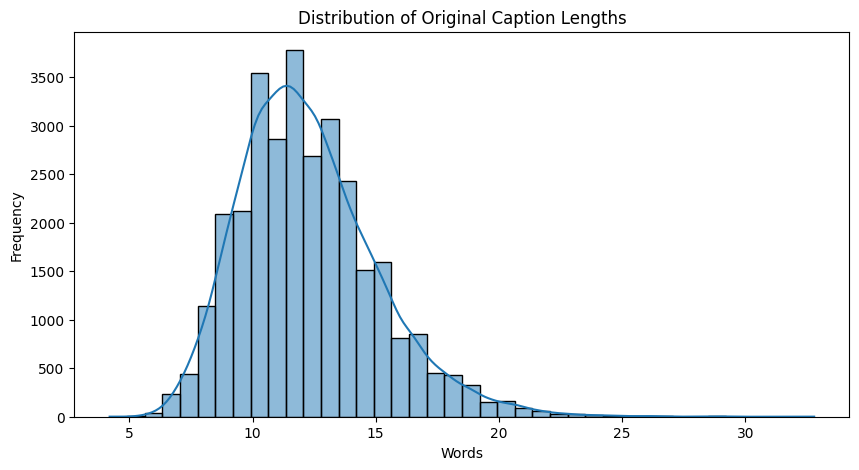

In [53]:
# Distribution of description lengths

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["original_len"], bins=40, kde=True)
plt.title("Distribution of Original Caption Lengths")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


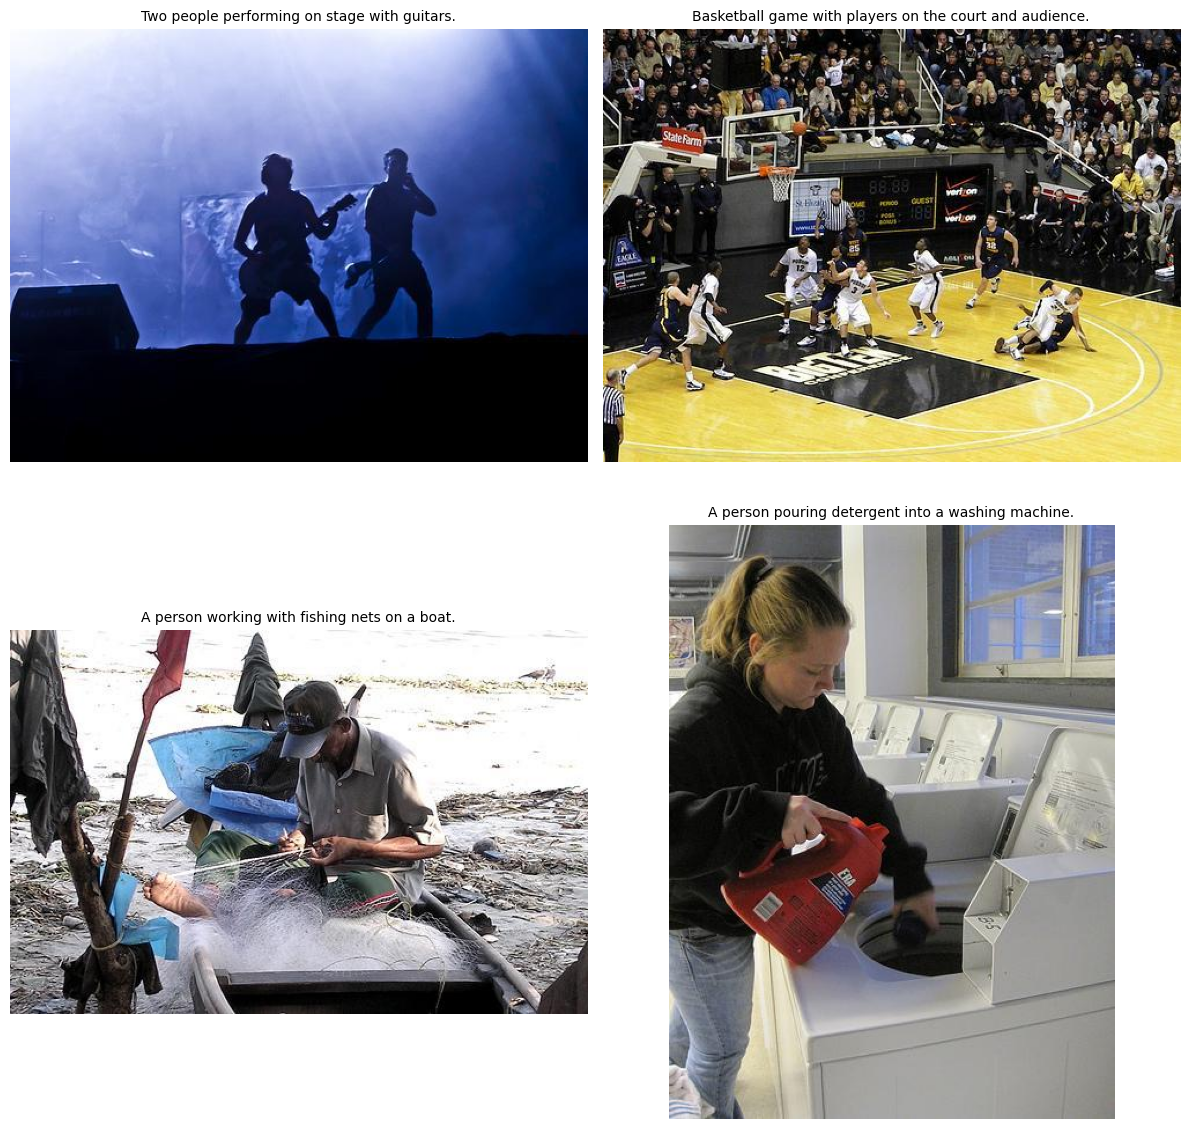

In [52]:
# View random images

import matplotlib.pyplot as plt
import random

def show_random(n=4):
    samples = random.sample(range(len(ds)), n)
    plt.figure(figsize=(12, 12))

    for i, idx in enumerate(samples):
        item = ds[idx]
        img = item["image"]
        caption = item["alt_text"]

        plt.subplot(2, 2, i+1)
        plt.imshow(img)
        plt.title(caption, fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_random(4)



In [48]:
# Comparison of original and GPT-4o descriptions

df_sample = df.sample(5)

for _, row in df_sample.iterrows():
    print("📌 FILENAME:", row["filename"])
    print(35 * "-")
    print("🔵 GPT-4o ALT TEXT:", row["alt_text"])
    print(50 * "--")
    print("🟢 ORIGINAL CAPTION:", row["original_alt_text"])
    print('\n')


📌 FILENAME: 4521610802.jpg
-----------------------------------
🔵 GPT-4o ALT TEXT: People buying food from a hot dog stand on the street.
----------------------------------------------------------------------------------------------------
🟢 ORIGINAL CAPTION: ['A blond man is waiting at a pretzel and hotdog stand on the sidewalk as a yellow taxi passes by in New York City.'
 'A man examines the offerings from a hotdog stand on the street in front of a yellow cab.'
 'A man stands in front of snack cart awaiting his pretzel on a busy New York street.'
 'A pedestrian waiting for his purchase from a NYC street vendor.'
 'A man in a red sweater waits at a street food stand.']


📌 FILENAME: 3614881872.jpg
-----------------------------------
🔵 GPT-4o ALT TEXT: Person skiing down a snowy slope with trees in the background.
----------------------------------------------------------------------------------------------------
🟢 ORIGINAL CAPTION: ['A lone snowboarder jumping in midair with a snow cov

In [49]:
# Number of objects and their composition

from collections import Counter
import itertools

all_objects = list(itertools.chain.from_iterable(df["objects"].dropna()))
Counter(all_objects).most_common(20)


[('people', 13178),
 ('person', 12243),
 ('trees', 4496),
 ('child', 3537),
 ('buildings', 2722),
 ('grass', 2123),
 ('street', 1947),
 ('building', 1568),
 ('dog', 1545),
 ('water', 1519),
 ('table', 1284),
 ('kids', 1186),
 ('chairs', 1073),
 ('fence', 998),
 ('sky', 873),
 ('stage', 848),
 ('snow', 837),
 ('sidewalk', 744),
 ('lights', 721),
 ('room', 698)]